## 로지스틱회귀


In [1]:
import pandas as pd          
from sklearn import model_selection
from sklearn import metrics
#from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#타이타닉 데이터 준비 
file_path= 'titanic.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 데이터 전처리
## 불필요 컬럼 삭제

In [2]:

del df['PassengerId']
del df['Name']
del df['Ticket']
del df['Cabin']

#결측치 처리 (x)
df.dropna(thresh=int(len(df) * 0.5), axis=1) #결측치 제거
df['Embarked'] = df['Embarked'].fillna('S') # 최다빈도 ‘S’로 대체
df['Age']=df['Age'].fillna(df['Age'].mean()) # 나이 평균값으로 대체


df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


## 범주형 컬럼 처리

In [3]:

df['Sex']=df['Sex'].astype('category') 
df['Pclass']=df['Pclass'].astype('category') 
df['Embarked']=df['Embarked'].astype('category')
df = pd.get_dummies(df)
df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,False,False,True,False,True,False,False,True
1,1,38.000000,1,0,71.2833,True,False,False,True,False,True,False,False
2,1,26.000000,0,0,7.9250,False,False,True,True,False,False,False,True
3,1,35.000000,1,0,53.1000,True,False,False,True,False,False,False,True
4,0,35.000000,0,0,8.0500,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,False,True,False,False,True,False,False,True
887,1,19.000000,0,0,30.0000,True,False,False,True,False,False,False,True
888,0,29.699118,1,2,23.4500,False,False,True,True,False,False,False,True
889,1,26.000000,0,0,30.0000,True,False,False,False,True,True,False,False


## 독립변수와 종속변수 구분 (x, y)

In [4]:

x_data=df.iloc[:,1:]
y_data=df.iloc[:,0]
x_data = x_data.values
y_data = y_data.values
print(x_data)
print(y_data)


[[22.0 1 0 ... False False True]
 [38.0 1 0 ... True False False]
 [26.0 0 0 ... False False True]
 ...
 [29.69911764705882 1 2 ... False False True]
 [26.0 0 0 ... True False False]
 [32.0 0 0 ... False True False]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 

## 머신러닝 
## 데이터분할(7:3)

In [5]:

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)

#로지스틱 모델링  - -------penalty loss함수? 최적화 목적함수 안에 있는 변수들을 바꿔주다가 목적함수가 최대가 되는 것을 말한다. maximum iteration 100개 
estimator = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
estimator.fit(x_train, y_train) #x값, y값 fitting

# train 평가 
y_predict = estimator.predict(x_train)
score = metrics.accuracy_score(y_train, y_predict) #classification
print('train score: ', score)

# test 평가 
y_predict = estimator.predict(x_test)
score = metrics.accuracy_score(y_test, y_predict)
print('test score: ', score)

#값은 돌릴 때마다 다르다. 


train score:  0.8105939004815409
test score:  0.7873134328358209


## 모델 검증 - f1 score

In [7]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
#150은 미리 알고 있는 test data를 돌릴 때, 실제로 살았는데 살았다고 판단 150 살았는데 죽었다고 판단 26명 precision 
#150/175가 0.86  
#recall은 재현도 실제로 죽었는데 살았다고 판단. recall 26/176 죽었는데 살았다고 판다. 
#accuracy 0.81로 판단한다. 

[[141  22]
 [ 35  70]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       163
           1       0.76      0.67      0.71       105

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



In [ ]:
#Precision (정밀도):

#150명 중에서 실제로 살았는데 살았다고 판단한 경우입니다.
#정밀도는 175150​=0.86으로 계산됩니다.



#Recall (재현율):

#176명 중에서 실제로 죽었는데 살았다고 판단한 경우입니다.
#재현율은 17626​=0.15로 계산됩니다.



#Accuracy (정확도):

#전체 268명 중에서 정확하게 예측한 비율입니다.정확도는 268150+26​=0.81로 계산됩니다.

## 모델 적용

In [8]:
 
print(x_test[0:2]) 
y_predict = estimator.predict(x_test[0:2])
print(y_predict) 
for y1, y2 in zip(y_test, y_predict):
    print(y1, y2, y1==y2)


[[30.0 0 0 7.2292 False False True False True True False False]
 [24.0 0 0 69.3 True False False True False True False False]]
[0 1]
0 0 True
1 1 True


## Decision Tree 의사결정나무

In [36]:
#의사결정 나무 독립변수 2개 평면에 점 두개를 찍고 난뒤 죽었는지 살았는지 파란색 빨간색 구분 두개씩 선을 그어서 나눈다. 파란색, 빨간색 더 많이 모여있는 곳 판단
#한쪽 파란색 분리가 잘 안 되어 잘 나누었는지 못 나누었는지 계수가 있다. -> 지니계수 얼마만큼 순수하게 섞여있는지를 판단한다. purity 
#낮아져있는 수치를 이동하면서 알아서 찾는다. 

In [9]:
import pandas as pd          
from sklearn import model_selection
from sklearn import metrics
#from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#타이타닉 데이터 준비 
file_path= 'titanic.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

## 데이터 전처리
#불필요 컬럼 삭제 (x)
del df['PassengerId']
del df['Name']
del df['Ticket']
del df['Cabin']

#결측치 처리 (x)
df.dropna(thresh=int(len(df) * 0.5), axis=1) #결측치 제거
df['Embarked'] = df['Embarked'].fillna('S') # 최다빈도 ‘S’로 대체
df['Age']=df['Age'].fillna(df['Age'].mean()) # 나이 평균값으로 대체

#범주형 컬럼 처리 (x) 
df['Sex']=df['Sex'].astype('category') 
df['Pclass']=df['Pclass'].astype('category') 
df['Embarked']=df['Embarked'].astype('category')
df = pd.get_dummies(df)

#독립변수와 종속변수 구분 (x, y)
x_data=df.iloc[:,1:]
y_data=df.iloc[:,0]
x_data = x_data.values
y_data = y_data.values
print(x_data)
print(y_data)


[[22.0 1 0 ... False False True]
 [38.0 1 0 ... True False False]
 [26.0 0 0 ... False False True]
 ...
 [29.69911764705882 1 2 ... False False True]
 [26.0 0 0 ... True False False]
 [32.0 0 0 ... False True False]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 

## Decision Tree

In [10]:
## 머신러닝 
#데이터분할(7:3)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)


#의사결정나무 모델링  DecisionTreeClassifier  criterion=gini로 하겠다 maximum depth은 없고 leaf는 없다. 노드를 몇개로 최대로 하겠는가? 없다. 
#몇개로 나눌 것인가? 최소 2개로 나눈다. min_samples_leaf=1, max_feature
estimator = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=20, max_features=None)
estimator.fit(x_train, y_train) #의사결정나무를 통해 estimator를 만든다 

# train 평가 
y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print('train score: ', score)

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print('test score: ', score)

#0.98,  0.76 test dats 76%를 맞춘다. logistic 회귀는 train이 더 떨어지고. test score는 더 높다.  ★Test score가 더 높은게 중요하다. !!! 

train score:  0.8218298555377207
test score:  0.7574626865671642


In [11]:
# 모델 검증 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

#비슷함. ▼ 과제 표를 찍어서 logistic, decisiontree matrix 과제 

[[144  32]
 [ 33  59]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       176
           1       0.65      0.64      0.64        92

    accuracy                           0.76       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.76      0.76      0.76       268



# 중요도 

In [12]:

estimator.fit(x_train, y_train)
print(estimator.feature_importances_)

d = {'attribute': df.iloc[:,1:].columns,
    'importance': estimator.feature_importances_ }
df_importance = pd.DataFrame(d)
df_importance.sort_values('importance', ascending=False)
print(df_importance)


[0.06485559 0.         0.02790094 0.0203432  0.0932213  0.
 0.13375219 0.         0.63842692 0.00500933 0.01649054 0.        ]
     attribute  importance
0          Age    0.064856
1        SibSp    0.000000
2        Parch    0.027901
3         Fare    0.020343
4     Pclass_1    0.093221
5     Pclass_2    0.000000
6     Pclass_3    0.133752
7   Sex_female    0.000000
8     Sex_male    0.638427
9   Embarked_C    0.005009
10  Embarked_Q    0.016491
11  Embarked_S    0.000000


Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


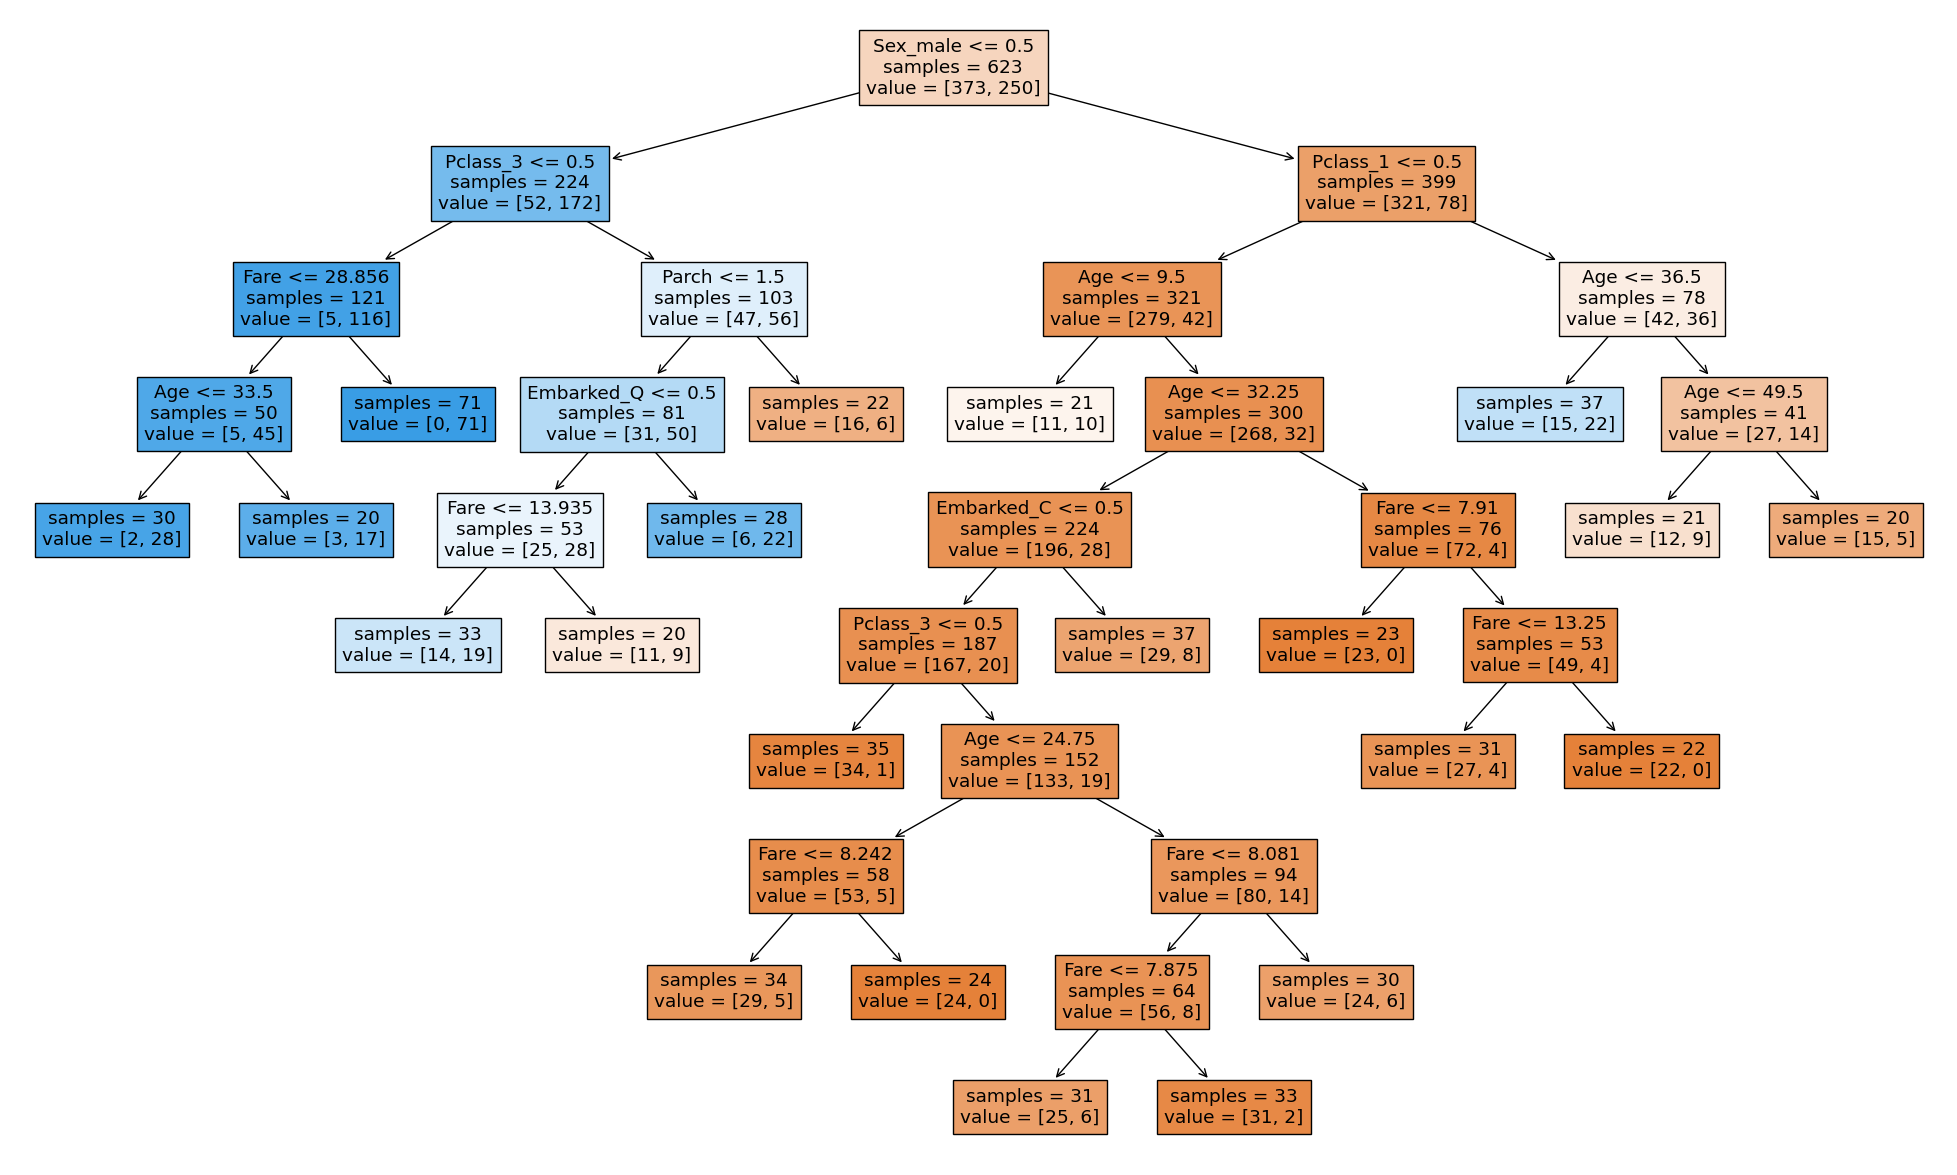

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,15))

temp = df.columns[1:]
print(temp)
tree.plot_tree(estimator, feature_names = temp, impurity=False, filled=True)
plt.show()

#빨간색 산 사람 파란색 죽은 사람 


Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


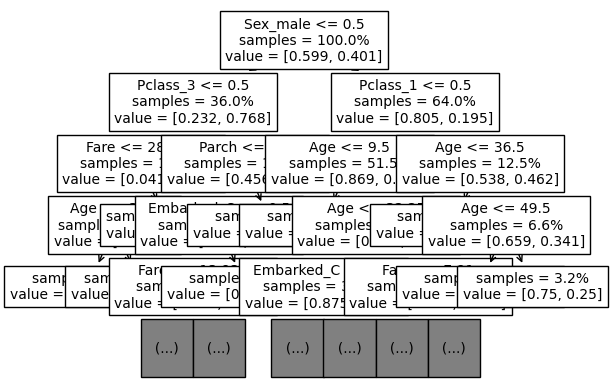

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt

temp = df.columns[1:]
print(temp)
a=tree.plot_tree(estimator,feature_names = temp,impurity=False, max_depth=4, fontsize=10, proportion=True)
plt.show(a)
#text 데이터 분류

## iris 데이터 분류

In [15]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris #반응변수 종이 setosa, 버즈니사

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
x_data=iris.iloc[:,0:4]
y_data=iris.iloc[:,4]
x_data = x_data.values
y_data = y_data.values
print(x_data)
print(y_data)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## train - test data  분리 및 평가

In [27]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)


#로지스틱 모델링  - -------> penalty loss함수? 최적화 목적함수 안에 있는 변수들을 바꿔주다가 목적함수가 최대가 되는 것을 말한다. maximum iteration 100개 
estimator = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=20, max_features=None)
estimator.fit(x_train, y_train) #x값, y값 fitting ---- 과적합을 방지하기 위함이다.

# train 평가 
y_predict = estimator.predict(x_train)
score = metrics.accuracy_score(y_train, y_predict) #classification
print('train score: ', score)

# test 평가 
y_predict = estimator.predict(x_test)
score = metrics.accuracy_score(y_test, y_predict)
print('test score: ', score)


train score:  0.9619047619047619
test score:  0.9555555555555556


## 모델 검증

In [18]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

#45개 중에서 5개의 data는 틀림. 


[[19  0  0]
 [ 0  9  8]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.53      0.69        17
   virginica       0.53      1.00      0.69         9

    accuracy                           0.82        45
   macro avg       0.84      0.84      0.79        45
weighted avg       0.91      0.82      0.82        45



## 2줄 테스트

In [19]:
print(x_test[0:2]) 
y_predict = estimator.predict(x_test[0:2])
print(y_predict) 
for y1, y2 in zip(y_test, y_predict):
    print(y1, y2, y1==y2)

[[5.5 3.5 1.3 0.2]
 [6.3 3.3 6.  2.5]]
['setosa' 'virginica']
setosa setosa True
virginica virginica True


## decision tree - train/test 평가

In [25]:
## 머신러닝 
#데이터분할(7:3)
## 머신러닝 
#데이터분할(7:3)
import seaborn as sns
import pandas as pd          
from sklearn import model_selection
from sklearn import metrics
#from sklearn import datasets
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.3)


#의사결정나무 모델링  DecisionTreeClassifier  criterion=gini로 하겠다 maximum depth은 없고 leaf는 없다. 노드를 몇개로 최대로 하겠는가? 없다. 
#몇개로 나눌 것인가? 최소 2개로 나눈다. min_samples_leaf=1, max_feature
estimator = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
estimator.fit(x_train, y_train) #의사결정나무를 통해 estimator를 만든다 

# train 평가 
y_predict = estimator.predict(x_train) 
score = metrics.accuracy_score(y_train, y_predict)
print('train score: ', score)

y_predict = estimator.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print('test score: ', score)

train score:  1.0
test score:  0.9111111111111111


## 모델 검증

In [28]:
# 모델 검증 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

#data를 정해서 분류 train test confussion matrix 만들어서 비교하는 내용 

#14는 실제 클래스 1 샘플 중에서 올바르게 예측한 샘플
#15는 실제 클래스 2 샘플 중에서 올바르게 예측한 샘플
#1은 실제 클래스  3 샘플 중에서 잘못 예측한 샘플 

[[14  0  0]
 [ 0 15  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        16
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 중요도 출력

In [30]:
# 중요도 

estimator.fit(x_train, y_train)
print(estimator.feature_importances_)

d = {'attribute': iris.iloc[:,0:4].columns,
    'importance': estimator.feature_importances_ }#df는 타이타닉 data프레임, iris가 dataframe이름
df_importance = pd.DataFrame(d)
df_importance.sort_values('importance', ascending=False)
print(df_importance)


[0. 0. 0. 1.]
      attribute  importance
0  sepal_length         0.0
1   sepal_width         0.0
2  petal_length         0.0
3   petal_width         1.0


## 트리구조 출력

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


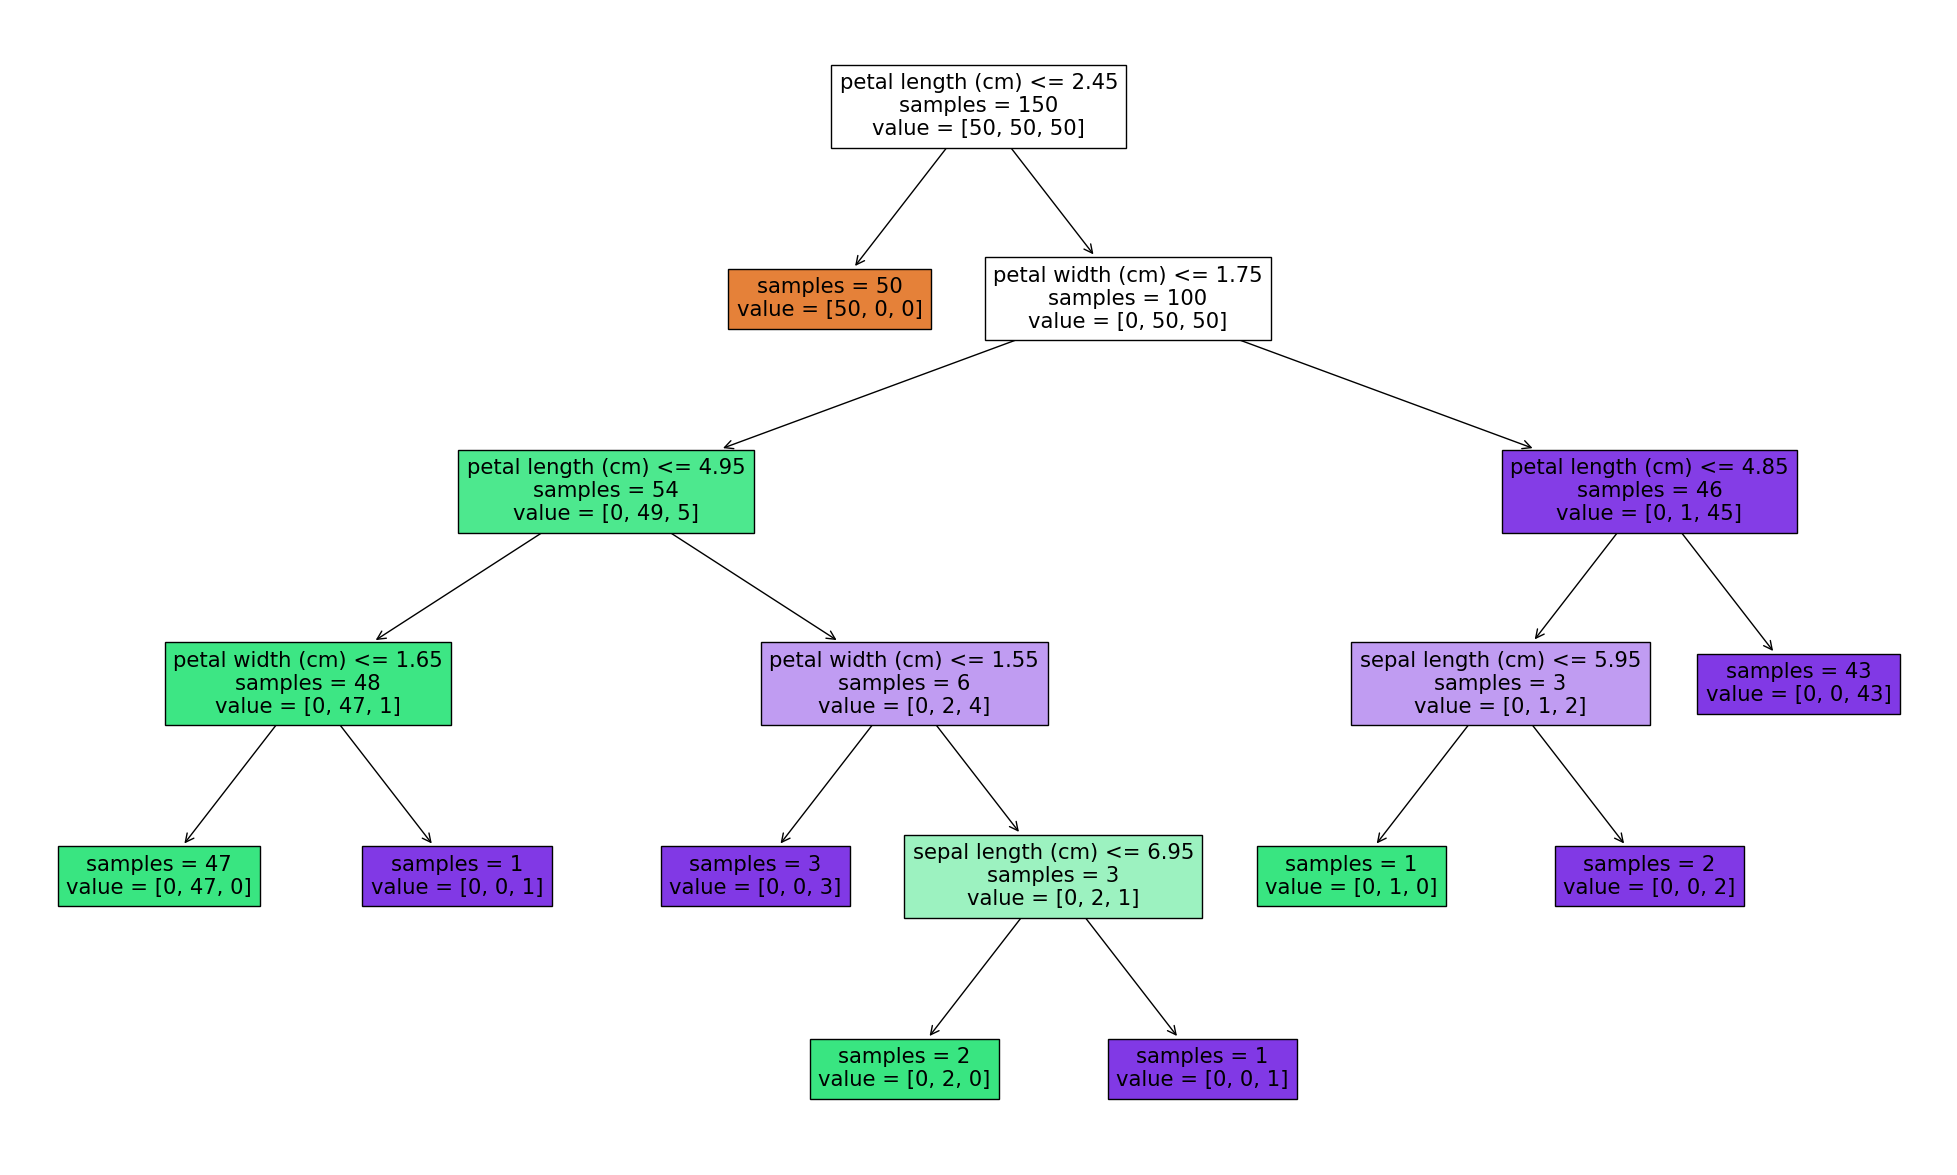

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


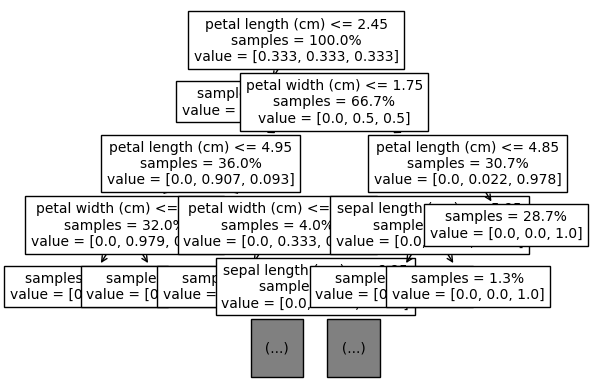

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# 데이터셋 로드
iris = load_iris()
X, y = iris.data, iris.target

# 의사결정나무 모델 학습
estimator = DecisionTreeClassifier()
estimator.fit(X, y)

# 첫 번째 플롯 생성
fig = plt.figure(figsize=(25,15))
temp = iris.feature_names
print(temp)
tree.plot_tree(estimator, feature_names=temp, impurity=False, filled=True)
plt.show()

# 두 번째 플롯 생성
temp = iris.feature_names[0:4]  # 첫 번째 특성을 제외한 나머지 특성 사용
print(temp)
tree.plot_tree(estimator, feature_names=temp, impurity=False, max_depth=4, fontsize=10, proportion=True)
plt.show()

